In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import os

In [292]:
data_dir = os.path.abspath('../raw')
imr_5yr_loc = os.path.join(data_dir, 'InfantMortality_Cluster5Year.csv')
imr_1yr_loc = os.path.join(data_dir, 'InfantMortality_ClusterYear.csv')
mat_ed_loc = os.path.join(data_dir, 'MaternalEducation_cluster.csv')

# Infant Mortality Rate - 5 year clusters
Analysis of data

In [293]:
imr_5yr = pd.read_csv(imr_5yr_loc)
imr_5yr

,cluster_id,yrgroup,country,imr,nbirth,lat,lon
0,AM2015_1,2001-2005,Armenia,0.000000,4,40.208171,44.471346
1,AM2015_1,2006-2010,Armenia,0.000000,2,40.208171,44.471346
2,AM2015_1,2011-2015,Armenia,0.000000,7,40.208171,44.471346
3,AM2015_10,2001-2005,Armenia,0.000000,2,40.202011,44.511379
4,AM2015_10,2006-2010,Armenia,0.000000,2,40.202011,44.511379
5,AM2015_10,2011-2015,Armenia,0.000000,4,40.202011,44.511379
6,AM2015_100,2001-2005,Armenia,0.000000,10,40.141674,44.034517
7,AM2015_100,2006-2010,Armenia,0.000000,6,40.141674,44.034517
8,AM2015_100,2011-2015,Armenia,0.000000,5,40.141674,44.034517
9,AM2015_101,2001-2005,Armenia,0.000000,3,40.149292,44.027902


In [294]:
num_rows = len(imr_5yr)
num_rows_0imr = len(imr_5yr[imr_5yr.imr == 0])
print('Number of cluster measurements:', num_rows)
print('Number of cluster measurements with imr 0:', num_rows_0imr)
print('Percentage:', num_rows_0imr / num_rows)
print('Number of unique clusters:', imr_5yr['cluster_id'].nunique())
print('Number of countries surveyed:', imr_5yr['country'].nunique())

Number of cluster measurements: 125261
Number of cluster measurements with imr 0: 85006
Percentage: 0.6786310184335108
Number of unique clusters: 42092
Number of countries surveyed: 25


### Plotting cluster geolocation

In [295]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.at[world.iso_a3=='TLS', 'name'] = 'Timor'

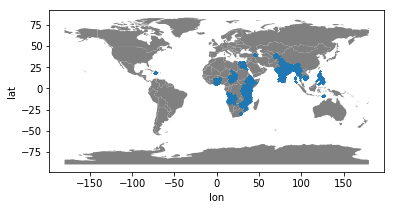

In [296]:
ax = world.plot(color="grey")
imr_5yr.plot(ax=ax, x='lon', y='lat', kind='scatter', s=0.1)

These are low-res polygons for the countries. Is there a better source?

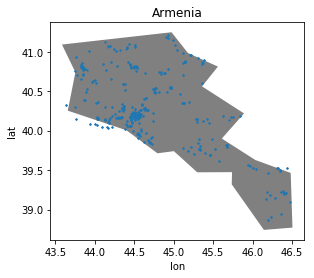

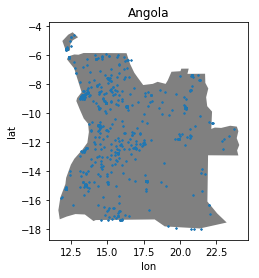

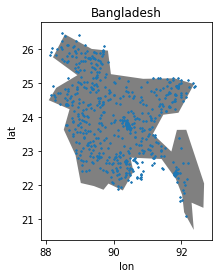

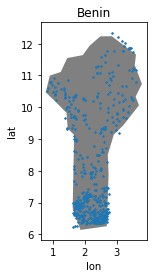

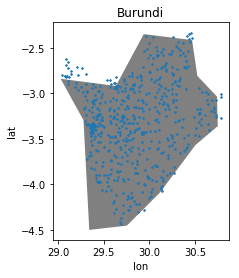

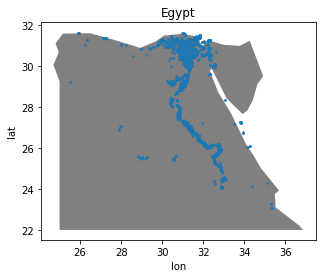

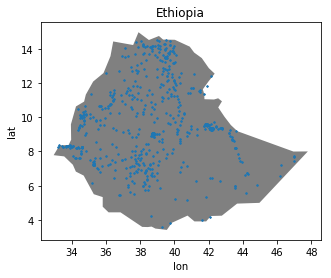

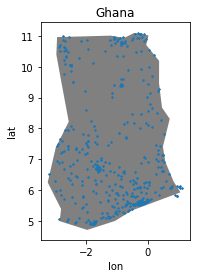

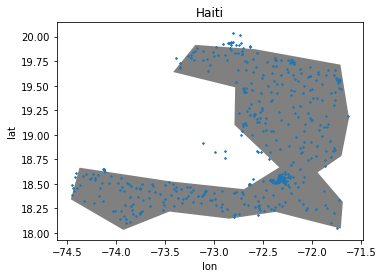

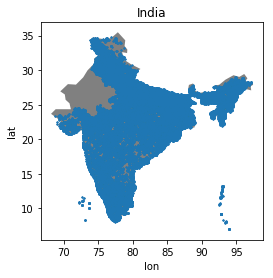

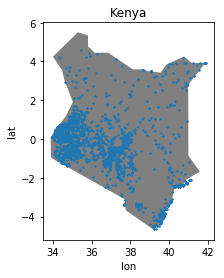

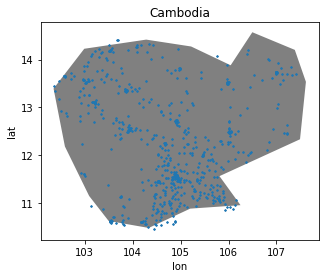

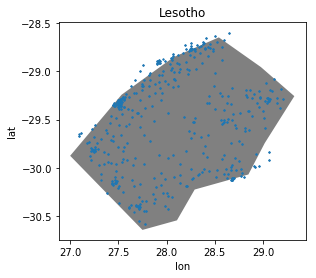

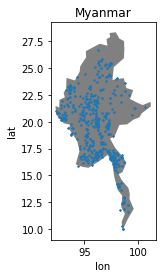

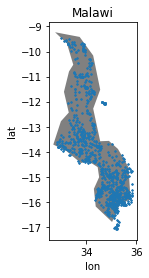

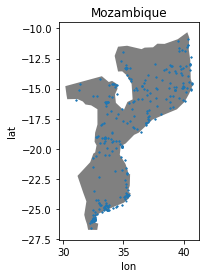

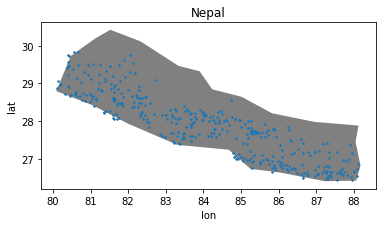

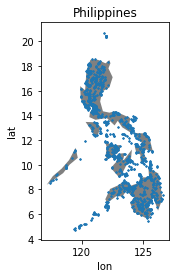

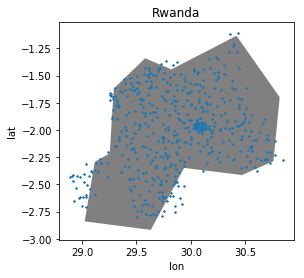

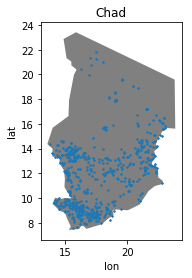

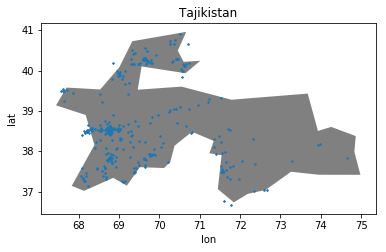

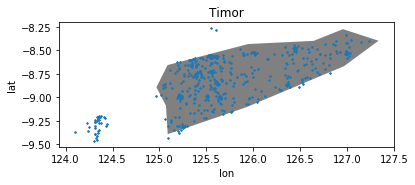

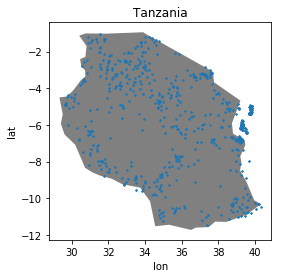

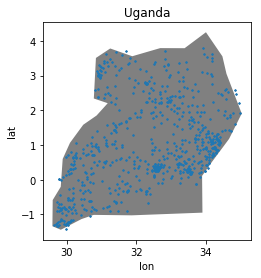

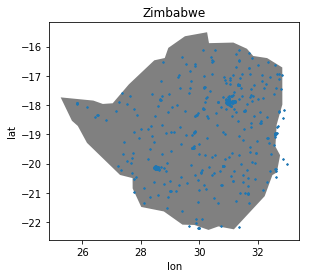

In [297]:
countries = imr_5yr.country.unique()
for country in countries:
    ax = world.loc[world.name==country].plot(color='grey')
    ax.set_title(country)
    imr_5yr.loc[imr_5yr.country==country].plot(ax=ax, x='lon', y='lat', kind='scatter', s=1)

# Country level statistics
Adding number of deaths as column

In [298]:
imr_5yr['ndeath'] = imr_5yr.imr * imr_5yr.nbirth

In [299]:
country_level_imr = imr_5yr.groupby(by=['country', 'yrgroup'])[['ndeath', 'nbirth']].sum()
country_level_imr['imr'] = country_level_imr.ndeath / country_level_imr.nbirth 
country_level_imr

ndeath  nbirth       imr
country     yrgroup                            
Angola      2001-2005   552.0    7681  0.071866
            2006-2010   568.0   11280  0.050355
            2011-2015   566.0   14170  0.039944
Armenia     2001-2005    29.0    1640  0.017683
            2006-2010    22.0    1780  0.012360
            2011-2015    11.0    1734  0.006344
Bangladesh  2001-2005   499.0    9209  0.054186
            2006-2010   391.0    8546  0.045752
            2011-2015   211.0    5826  0.036217
Benin       2001-2005   787.0   12991  0.060580
            2006-2010   691.0   10521  0.065678
            2011-2015   724.0   12440  0.058199
Burundi     2001-2005   781.0   11215  0.069639
            2006-2010   629.0   12058  0.052165
            2011-2015   561.0   12886  0.043536
Cambodia    2001-2005   371.0    6747  0.054987
            2006-2010   325.0    7400  0.043919
            2011-2015   117.0    5298  0.022084
Chad        2001-2005  1153.0   14645  0.078730
            2006-2010  1649.0   20685  0.079720
            2011-2015   886.0   14767  0.059999
Egypt       2001-2005   360.0   11834  0.030421
            2006-2010   387.0   14211  0.027232
            2011-2015   228.0   11143  0.020461
Ethiopia    2001-2005   639.0    8836  0.072318
            2006-2010   754.0   10575  0.071300
            2011-2015   494.0   10230  0.048289
Ghana       2001-2005   258.0    4693  0.054975
            2006-2010   288.0    5528  0.052098
            2011-2015   180.0    4575  0.039344
...                       ...     ...       ...
Malawi      2011-2015   669.0   16999  0.039355
Mozambique  2006-2010    29.0    1495  0.019398
            2011-2015   119.0    4861  0.024481
Myanmar     2001-2005   412.0    5099  0.080800
            2006-2010   366.0    5221  0.070102
            2011-2015   197.0    4848  0.040635
Nepal       2001-2005   349.0    6269  0.055671
            2006-2010   257.0    5413  0.047478
            2011-2015   181.0    5141  0.035207
Philippines 2001-2005   262.0   12004  0.021826
            2006-2010   235.0   10711  0.021940
            2011-2015   237.0   10650  0.022254
Rwanda      2001-2005   499.0    6829  0.073071
            2006-2010   321.0    7810  0.041101
            2011-2015   209.0    6609  0.031624
Tajikistan  2001-2005   185.0    5617  0.032936
            2006-2010   124.0    4730  0.026216
            2011-2015   150.0    5953  0.025197
Tanzania    2001-2005   445.0    7207  0.061746
            2006-2010   515.0    9046  0.056931
            2011-2015   401.0    9989  0.040144
Timor       2001-2005   259.0    7579  0.034173
            2006-2010   234.0    7454  0.031393
            2011-2015   211.0    7011  0.030096
Uganda      2001-2005   854.0   12751  0.066975
            2006-2010   770.0   14024  0.054906
            2011-2015   625.0   15242  0.041005
Zimbabwe    2001-2005   189.0    3993  0.047333
            2006-2010   353.0    5266  0.067034
            2011-2015   248.0    5794  0.042803

[74 rows x 3 columns]

### Plotting Country Level IMR by year group

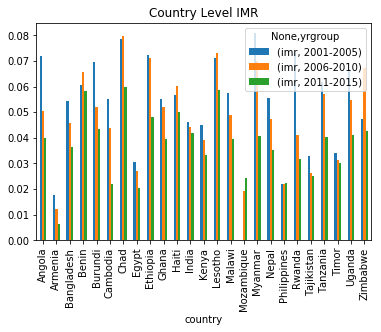

In [300]:
unstacked_country_level_imr = country_level_imr[['imr']].unstack()
unstacked_country_level_imr.plot(kind = 'bar', title='Country Level IMR')

### Plotting on Map

In [301]:
country_level_imr_flat = country_level_imr.reset_index()
country_level_imr_latest = country_level_imr_flat[country_level_imr_flat.yrgroup == '2011-2015']
merged_imr = pd.merge(country_level_imr_latest, world, left_on='country', right_on='name', how='right') 
merged_imr

,country,yrgroup,ndeath,nbirth,imr,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Angola,2011-2015,566.0,14170.0,0.039944,1.279929e+07,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
1,Armenia,2011-2015,11.0,1734.0,0.006344,2.967004e+06,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
2,Bangladesh,2011-2015,211.0,5826.0,0.036217,1.560509e+08,Asia,Bangladesh,BGD,224000.0,"POLYGON ((92.67272098182556 22.04123891854125,..."
3,Benin,2011-2015,724.0,12440.0,0.058199,8.791832e+06,Africa,Benin,BEN,12830.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
4,Burundi,2011-2015,561.0,12886.0,0.043536,8.988091e+06,Africa,Burundi,BDI,3102.0,POLYGON ((29.33999759290035 -4.499983412294092...
5,Cambodia,2011-2015,117.0,5298.0,0.022084,1.449429e+07,Asia,Cambodia,KHM,27940.0,"POLYGON ((103.4972799011397 10.63255544681593,..."
6,Chad,2011-2015,886.0,14767.0,0.059999,1.032921e+07,Africa,Chad,TCD,15860.0,"POLYGON ((14.4957873877629 12.85939626713736, ..."
7,Egypt,2011-2015,228.0,11143.0,0.020461,8.308287e+07,Africa,Egypt,EGY,443700.0,"POLYGON ((34.9226 29.50133, 34.64174 29.09942,..."
8,Ethiopia,2011-2015,494.0,10230.0,0.048289,8.523734e+07,Africa,Ethiopia,ETH,68770.0,"POLYGON ((37.90607000000011 14.95943000000017,..."
9,Ghana,2011-2015,180.0,4575.0,0.039344,2.383250e+07,Africa,Ghana,GHA,34200.0,"POLYGON ((1.060121697604927 5.928837388528876,..."


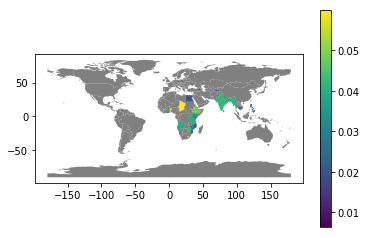

In [302]:
# fig, ax = plt.subplots(1, 1)
ax = world.plot(color="grey")
gpd.GeoDataFrame(merged_imr).dropna().plot(column='imr', ax=ax, legend=True)

# Maternal Education
For maternal education, the observation is a “cluster” x education category.  there are 4 maternal education categories given in variable mother_ed_cat:

| category | level of education        |  
|---|---------------------|
| 0 | no education        |  
| 1 | primary education   |
| 2 | secondary education |
| 3 | higher education    |

In [303]:
mat_ed = pd.read_csv(mat_ed_loc)
mat_ed

,country,cluster_id,svy_yr,mother_ed_cat,pct,ntot,lat,lon
0,Armenia,AM2015_1,2015,2.0,0.166667,12,40.208171,44.471346
1,Armenia,AM2015_1,2015,3.0,0.833333,12,40.208171,44.471346
2,Armenia,AM2015_10,2015,2.0,0.111111,9,40.202011,44.511379
3,Armenia,AM2015_10,2015,3.0,0.888889,9,40.202011,44.511379
4,Armenia,AM2015_100,2015,2.0,0.571429,14,40.141674,44.034517
5,Armenia,AM2015_100,2015,3.0,0.428571,14,40.141674,44.034517
6,Armenia,AM2015_101,2015,1.0,0.200000,10,40.149292,44.027902
7,Armenia,AM2015_101,2015,2.0,0.200000,10,40.149292,44.027902
8,Armenia,AM2015_101,2015,3.0,0.600000,10,40.149292,44.027902
9,Armenia,AM2015_102,2015,1.0,0.066667,15,40.087035,44.007822


In [304]:
num_rows = len(mat_ed)
print('Number of cluster measurements:', num_rows)
print('Number of unique clusters:', imr_5yr['cluster_id'].nunique())
print('Number of countries surveyed:', imr_5yr['country'].nunique())

Number of cluster measurements: 130419
Number of unique clusters: 42092
Number of countries surveyed: 25


In [305]:
mat_ed.svy_yr.value_counts()

2015    96306
2014    18525
2016     9705
2017     5883
Name: svy_yr, dtype: int64

# Country level statistics
Adding raw number of educated as column

In [306]:
mat_ed['npercat'] = mat_ed.pct * mat_ed.ntot

Each country has one survey year, which differs from country to country

In [307]:
country_level_ed = mat_ed.groupby(by=['country', 'mother_ed_cat'])[['npercat']].sum()
# country_level_ed['pct'] = country_level_ed.npercat / country_level_ed.ntot 
country_level_ed = country_level_ed.unstack()['npercat']
country_level_ed['ntot'] = country_level_ed[0.0] + country_level_ed[1.0] + country_level_ed[2.0] + country_level_ed[3.0]
country_level_ed['pct0'] = country_level_ed[0.0] / country_level_ed['ntot']
country_level_ed['pct1'] = country_level_ed[1.0] / country_level_ed['ntot']
country_level_ed['pct2'] = country_level_ed[2.0] / country_level_ed['ntot']
country_level_ed['pct3'] = country_level_ed[3.0] / country_level_ed['ntot']
country_level_ed = country_level_ed[['pct0', 'pct1', 'pct2', 'pct3', 'ntot']]
country_level_ed

mother_ed_cat,pct0,pct1,pct2,pct3,ntot
country,,,,,
Angola,0.323376,0.364729,0.286060,0.025834,11148.0
Armenia,0.000735,0.054889,0.451360,0.493016,4081.0
Bangladesh,0.251499,0.302710,0.362228,0.083562,16012.0
Benin,0.655875,0.180768,0.149182,0.014174,11429.0
Burundi,0.468424,0.392679,0.128749,0.010148,11037.0
Cambodia,0.163581,0.518048,0.290980,0.027391,11719.0
Chad,0.736872,0.178034,0.079582,0.005513,14149.0
Egypt,0.229405,0.101652,0.525693,0.143250,19616.0
Ethiopia,0.596024,0.269551,0.086537,0.047887,9961.0


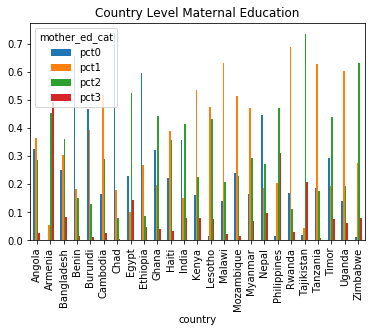

In [308]:
country_level_ed[['pct0', 'pct1', 'pct2', 'pct3']].plot(kind = 'bar', title='Country Level Maternal Education')

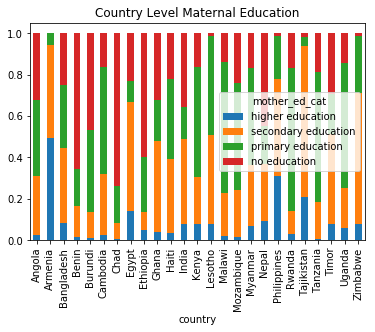

In [309]:
# country_level_ed[['pct0', 'pct1', 'pct2', 'pct3']].plot.bar(stacked=True, title='Country Level Maternal Education')
cat_to_meaning = {
    'pct3': 'higher education', 'pct2': 'secondary education', 'pct1': 'primary education', 'pct0': 'no education'
}

country_level_ed[['pct3', 'pct2', 'pct1', 'pct0']].rename(columns=cat_to_meaning) \
    .plot.bar(stacked=True, title='Country Level Maternal Education')

In [310]:
merged_mat_ed = pd.merge(country_level_ed, world, left_on='country', right_on='name', how='left') 
merged_mat_ed

,pct0,pct1,pct2,pct3,ntot,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,0.323376,0.364729,0.286060,0.025834,11148.0,1.279929e+07,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
1,0.000735,0.054889,0.451360,0.493016,4081.0,2.967004e+06,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
2,0.251499,0.302710,0.362228,0.083562,16012.0,1.560509e+08,Asia,Bangladesh,BGD,224000.0,"POLYGON ((92.67272098182556 22.04123891854125,..."
3,0.655875,0.180768,0.149182,0.014174,11429.0,8.791832e+06,Africa,Benin,BEN,12830.0,"POLYGON ((2.691701694356254 6.258817246928629,..."
4,0.468424,0.392679,0.128749,0.010148,11037.0,8.988091e+06,Africa,Burundi,BDI,3102.0,POLYGON ((29.33999759290035 -4.499983412294092...
5,0.163581,0.518048,0.290980,0.027391,11719.0,1.449429e+07,Asia,Cambodia,KHM,27940.0,"POLYGON ((103.4972799011397 10.63255544681593,..."
6,0.736872,0.178034,0.079582,0.005513,14149.0,1.032921e+07,Africa,Chad,TCD,15860.0,"POLYGON ((14.4957873877629 12.85939626713736, ..."
7,0.229405,0.101652,0.525693,0.143250,19616.0,8.308287e+07,Africa,Egypt,EGY,443700.0,"POLYGON ((34.9226 29.50133, 34.64174 29.09942,..."
8,0.596024,0.269551,0.086537,0.047887,9961.0,8.523734e+07,Africa,Ethiopia,ETH,68770.0,"POLYGON ((37.90607000000011 14.95943000000017,..."
9,0.322907,0.197168,0.441488,0.038438,6426.0,2.383250e+07,Africa,Ghana,GHA,34200.0,"POLYGON ((1.060121697604927 5.928837388528876,..."


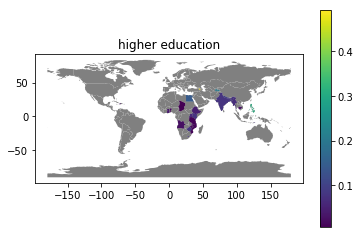

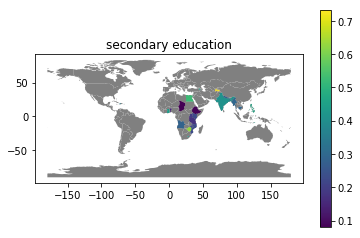

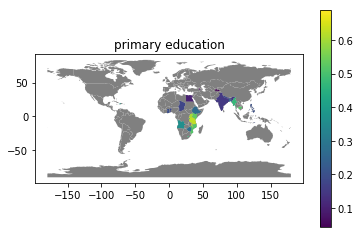

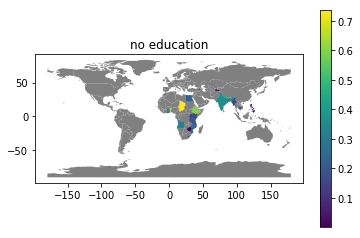

In [311]:
# fig, ax = plt.subplots(1, 1)
for col in ['pct3', 'pct2', 'pct1', 'pct0']:
    ax = world.plot(color="grey")
    ax.set_title(cat_to_meaning[col])
    gpd.GeoDataFrame(merged_mat_ed).dropna().plot(column=col, ax=ax, legend=True)

# Correlations

### Country Level

In [312]:
country_level_imr_flat = country_level_imr.reset_index()
country_level_imr_recent = country_level_imr_flat.loc[country_level_imr_flat.yrgroup=='2011-2015']
country_level_imr_recent
country_level_ed_flat = country_level_ed.reset_index()
country_level_combined = pd.merge(country_level_ed_flat, country_level_imr_recent, on='country')
country_level_combined

,country,pct0,pct1,pct2,pct3,ntot,yrgroup,ndeath,nbirth,imr
0,Angola,0.323376,0.364729,0.286060,0.025834,11148.0,2011-2015,566.0,14170,0.039944
1,Armenia,0.000735,0.054889,0.451360,0.493016,4081.0,2011-2015,11.0,1734,0.006344
2,Bangladesh,0.251499,0.302710,0.362228,0.083562,16012.0,2011-2015,211.0,5826,0.036217
3,Benin,0.655875,0.180768,0.149182,0.014174,11429.0,2011-2015,724.0,12440,0.058199
4,Burundi,0.468424,0.392679,0.128749,0.010148,11037.0,2011-2015,561.0,12886,0.043536
5,Cambodia,0.163581,0.518048,0.290980,0.027391,11719.0,2011-2015,117.0,5298,0.022084
6,Chad,0.736872,0.178034,0.079582,0.005513,14149.0,2011-2015,886.0,14767,0.059999
7,Egypt,0.229405,0.101652,0.525693,0.143250,19616.0,2011-2015,228.0,11143,0.020461
8,Ethiopia,0.596024,0.269551,0.086537,0.047887,9961.0,2011-2015,494.0,10230,0.048289
9,Ghana,0.322907,0.197168,0.441488,0.038438,6426.0,2011-2015,180.0,4575,0.039344


Pearson correlation of higher education and imr: -0.6583782825142589
Pearson correlation of secondary education and imr: -0.40534267664492424
Pearson correlation of primary education and imr: 0.16051647661236318
Pearson correlation of no education and imr: 0.5437465243042681


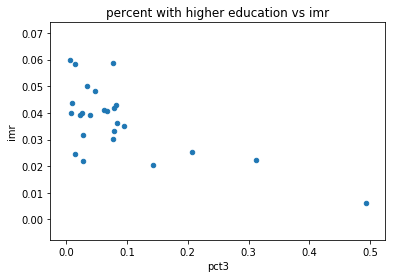

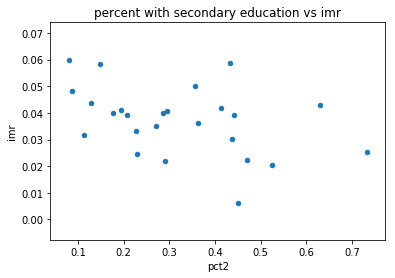

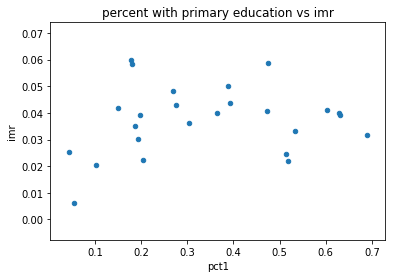

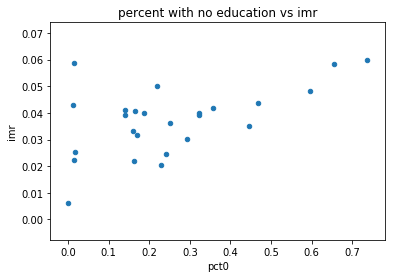

In [313]:
for ed_cat, level in cat_to_meaning.items():
    title = "percent with {} vs imr".format(level)
    country_level_combined.plot(x=ed_cat, y='imr', kind='scatter', title=title)
    corr = country_level_combined[[ed_cat, 'imr']].corr('pearson').loc[ed_cat, 'imr']
    print('Pearson correlation of {} and imr: {}'.format(level, corr))

### Per country correlations at the cluster level

In [314]:
imr_5yr_recent = imr_5yr.loc[imr_5yr.yrgroup=='2011-2015']
imr_5yr_recent

,cluster_id,yrgroup,country,imr,nbirth,lat,lon,ndeath
2,AM2015_1,2011-2015,Armenia,0.000000,7,40.208171,44.471346,0.0
5,AM2015_10,2011-2015,Armenia,0.000000,4,40.202011,44.511379,0.0
8,AM2015_100,2011-2015,Armenia,0.000000,5,40.141674,44.034517,0.0
11,AM2015_101,2011-2015,Armenia,0.000000,2,40.149292,44.027902,0.0
14,AM2015_102,2011-2015,Armenia,0.000000,4,40.087035,44.007822,0.0
17,AM2015_103,2011-2015,Armenia,0.000000,11,40.171558,44.023475,0.0
20,AM2015_104,2011-2015,Armenia,0.000000,5,40.158098,44.041441,0.0
23,AM2015_105,2011-2015,Armenia,0.000000,7,40.135985,44.131777,0.0
26,AM2015_106,2011-2015,Armenia,0.000000,10,40.140644,44.123215,0.0
29,AM2015_107,2011-2015,Armenia,0.000000,5,40.075739,44.032439,0.0


In [315]:
mat_ed_flat = mat_ed
for cat in range(4):
    col = 'pct{}'.format(cat)
    meaning = cat_to_meaning[col]
    mat_ed_flat.loc[mat_ed_flat.mother_ed_cat==cat, '{}_pct'.format(meaning)] = mat_ed_flat.pct
    
mat_ed_flat = mat_ed_flat.groupby('cluster_id').agg(max).fillna(0)
mat_ed_flat = mat_ed_flat[['country', 'svy_yr', 'ntot', 'lat', 'lon',
                           'no education_pct', 'primary education_pct',
                           'secondary education_pct', 'higher education_pct']].reset_index()
mat_ed_flat

,cluster_id,country,svy_yr,ntot,lat,lon,no education_pct,primary education_pct,secondary education_pct,higher education_pct
0,AM2015_1,Armenia,2015,12,40.208171,44.471346,0.000000,0.000000,0.166667,0.833333
1,AM2015_10,Armenia,2015,9,40.202011,44.511379,0.000000,0.000000,0.111111,0.888889
2,AM2015_100,Armenia,2015,14,40.141674,44.034517,0.000000,0.000000,0.571429,0.428571
3,AM2015_101,Armenia,2015,10,40.149292,44.027902,0.000000,0.200000,0.200000,0.600000
4,AM2015_102,Armenia,2015,15,40.087035,44.007822,0.000000,0.066667,0.533333,0.400000
5,AM2015_103,Armenia,2015,21,40.171558,44.023475,0.000000,0.047619,0.333333,0.619048
6,AM2015_104,Armenia,2015,15,40.158098,44.041441,0.000000,0.000000,0.333333,0.666667
7,AM2015_105,Armenia,2015,14,40.135985,44.131777,0.000000,0.071429,0.357143,0.571429
8,AM2015_106,Armenia,2015,14,40.140644,44.123215,0.000000,0.071429,0.428571,0.500000
9,AM2015_107,Armenia,2015,18,40.075739,44.032439,0.000000,0.388889,0.388889,0.222222


In [316]:
cluster_level_combined = pd.merge(mat_ed_flat, imr_5yr_recent[['cluster_id', 'imr']], on='cluster_id', how='inner')
cluster_level_combined

,cluster_id,country,svy_yr,ntot,lat,lon,no education_pct,primary education_pct,secondary education_pct,higher education_pct,imr
0,AM2015_1,Armenia,2015,12,40.208171,44.471346,0.000000,0.000000,0.166667,0.833333,0.000000
1,AM2015_10,Armenia,2015,9,40.202011,44.511379,0.000000,0.000000,0.111111,0.888889,0.000000
2,AM2015_100,Armenia,2015,14,40.141674,44.034517,0.000000,0.000000,0.571429,0.428571,0.000000
3,AM2015_101,Armenia,2015,10,40.149292,44.027902,0.000000,0.200000,0.200000,0.600000,0.000000
4,AM2015_102,Armenia,2015,15,40.087035,44.007822,0.000000,0.066667,0.533333,0.400000,0.000000
5,AM2015_103,Armenia,2015,21,40.171558,44.023475,0.000000,0.047619,0.333333,0.619048,0.000000
6,AM2015_104,Armenia,2015,15,40.158098,44.041441,0.000000,0.000000,0.333333,0.666667,0.000000
7,AM2015_105,Armenia,2015,14,40.135985,44.131777,0.000000,0.071429,0.357143,0.571429,0.000000
8,AM2015_106,Armenia,2015,14,40.140644,44.123215,0.000000,0.071429,0.428571,0.500000,0.000000
9,AM2015_107,Armenia,2015,18,40.075739,44.032439,0.000000,0.388889,0.388889,0.222222,0.000000


Pearson correlation of higher education and imr in Armenia: -0.05314243933373718
Pearson correlation of secondary education and imr in Armenia: 0.06357424588728856
Pearson correlation of primary education and imr in Armenia: -0.011534981165645209
Pearson correlation of no education and imr in Armenia: -0.01725442584555167
Pearson correlation of higher education and imr in Angola: -0.11800818399948852
Pearson correlation of secondary education and imr in Angola: -0.1542017266563347
Pearson correlation of primary education and imr in Angola: 0.15421522000072427
Pearson correlation of no education and imr in Angola: 0.05667142066510404
Pearson correlation of higher education and imr in Bangladesh: -0.11224028799494215
Pearson correlation of secondary education and imr in Bangladesh: -0.07239921923911005
Pearson correlation of primary education and imr in Bangladesh: 0.1075480418194197
Pearson correlation of no education and imr in Bangladesh: 0.06716051219038616
Pearson correlation of hig

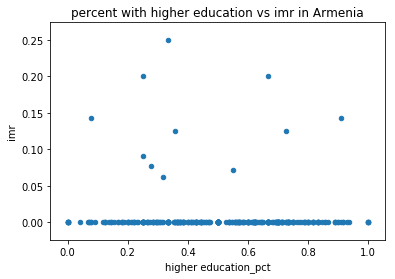

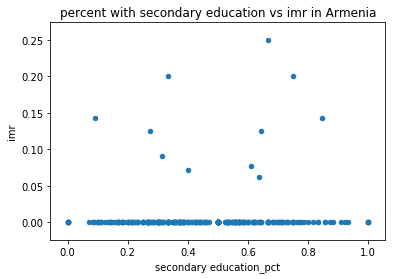

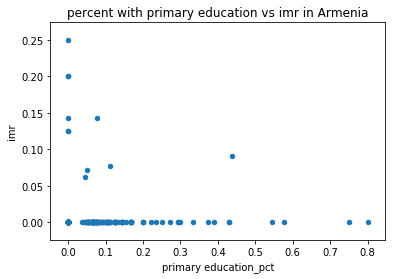

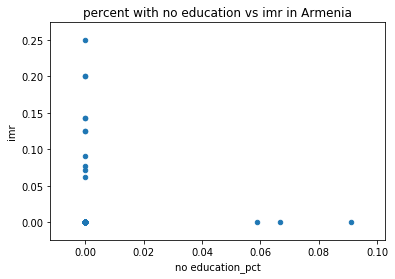

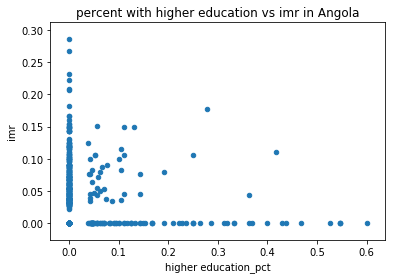

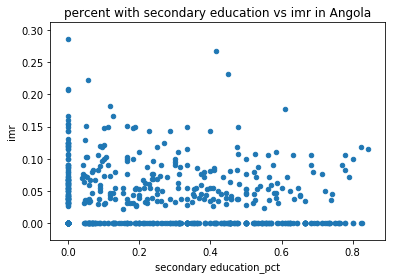

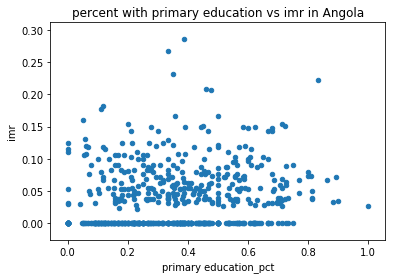

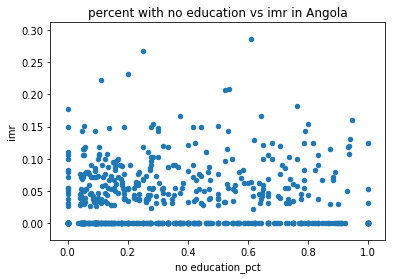

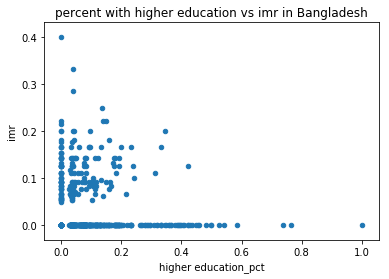

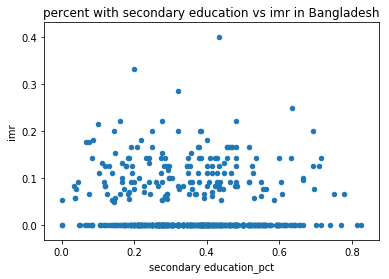

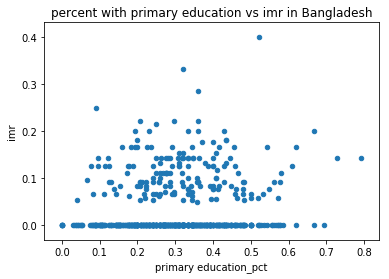

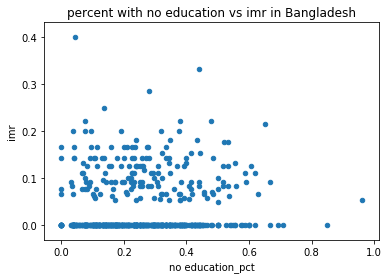

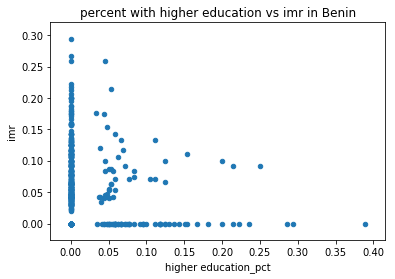

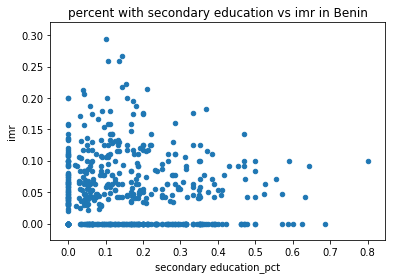

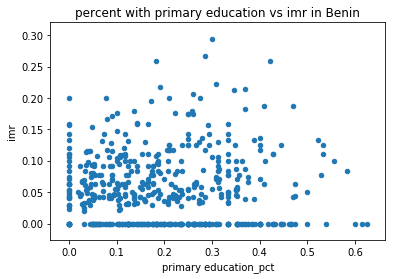

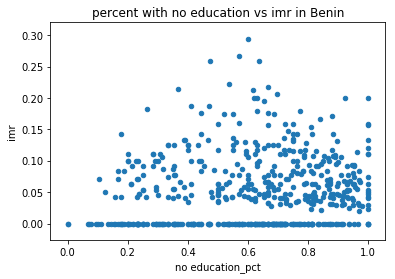

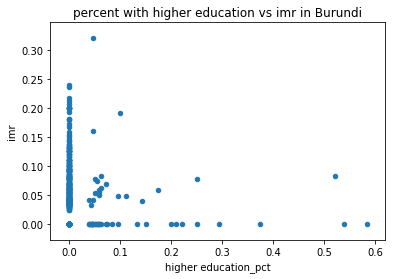

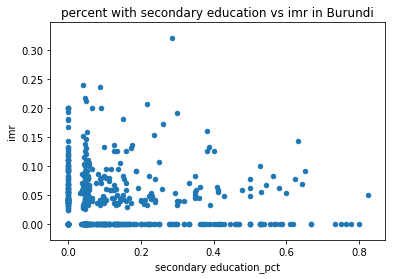

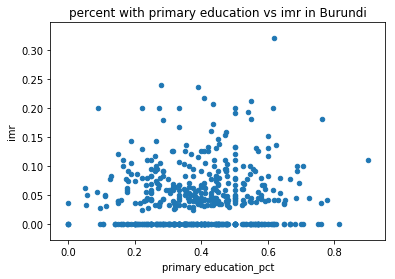

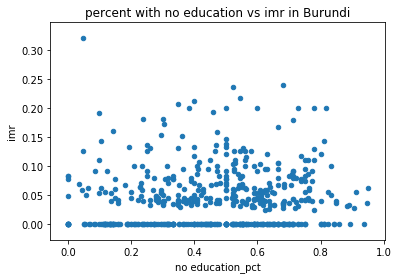

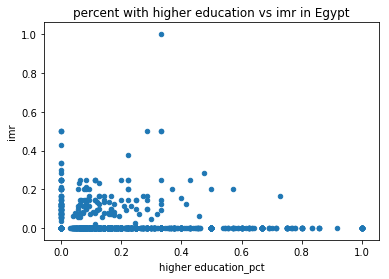

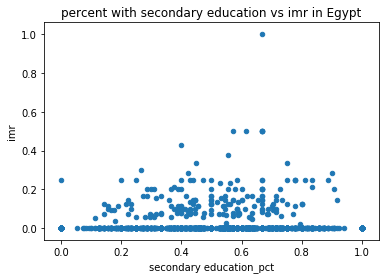

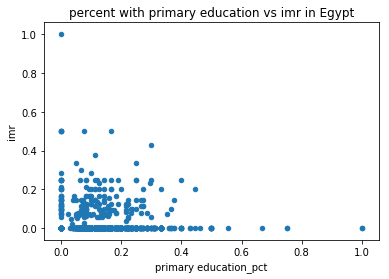

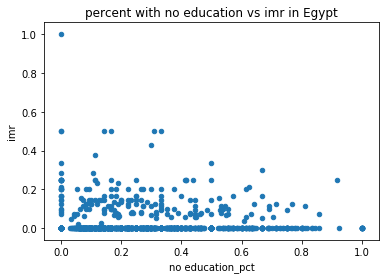

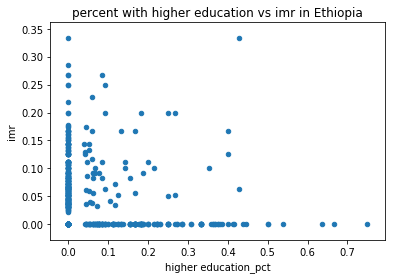

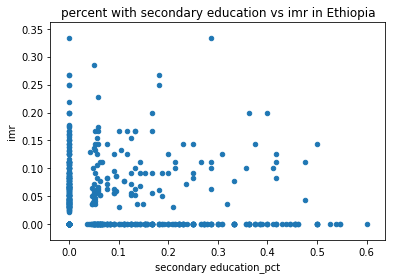

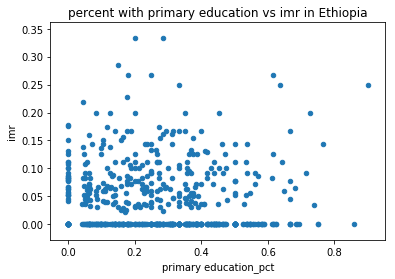

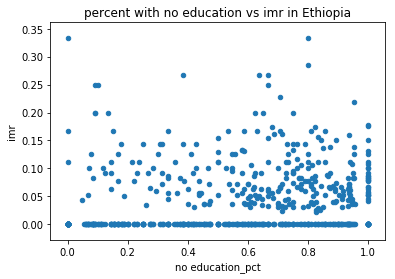

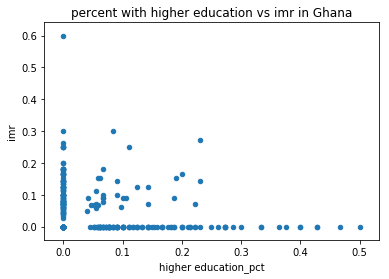

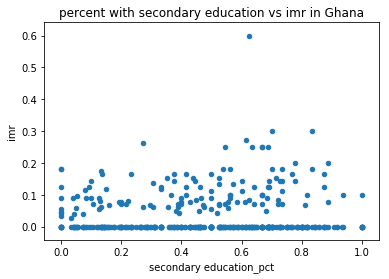

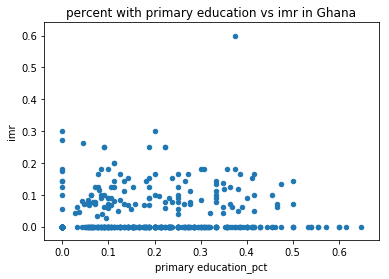

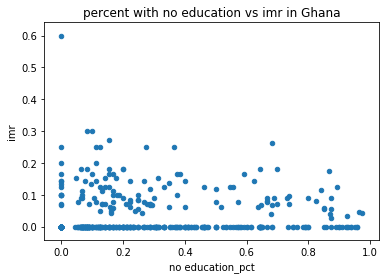

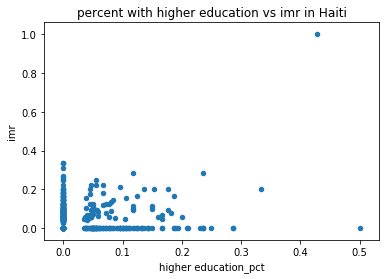

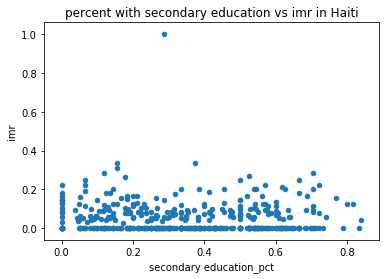

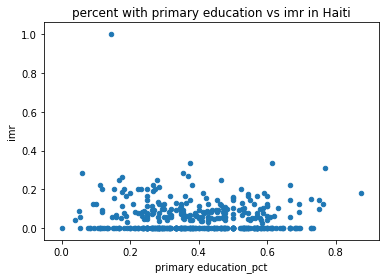

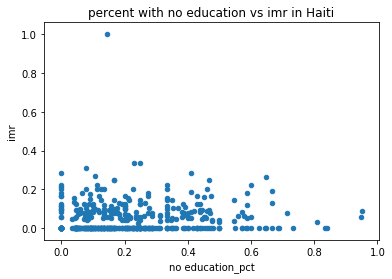

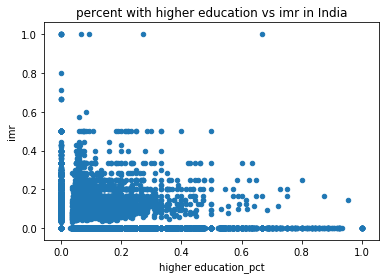

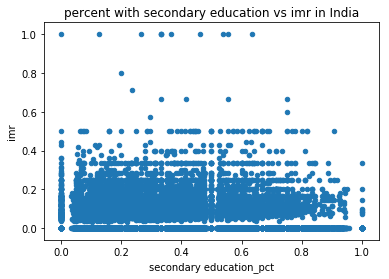

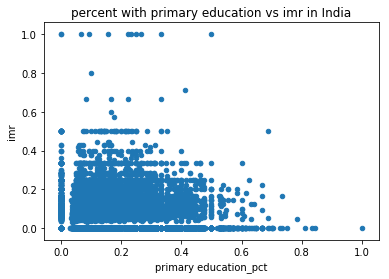

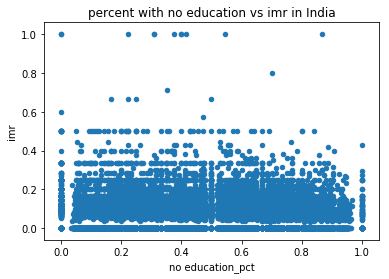

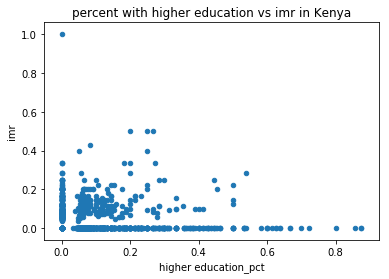

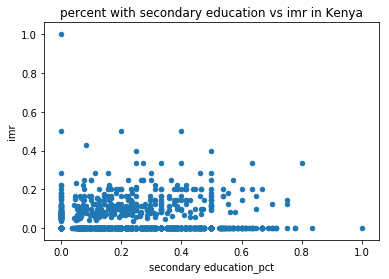

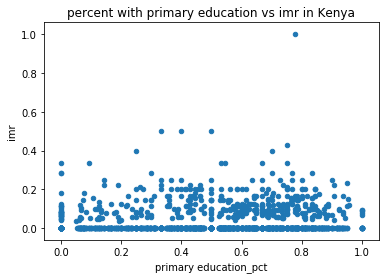

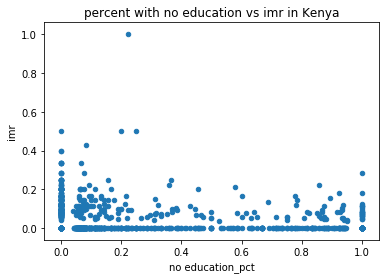

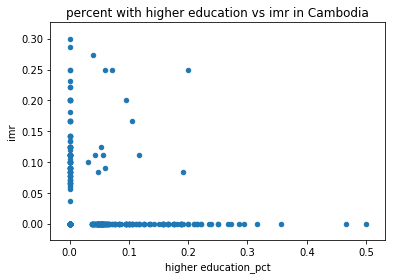

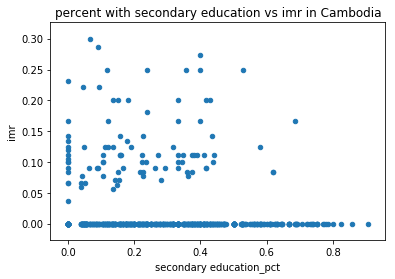

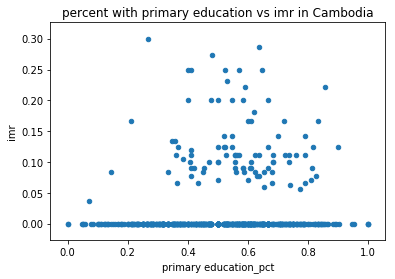

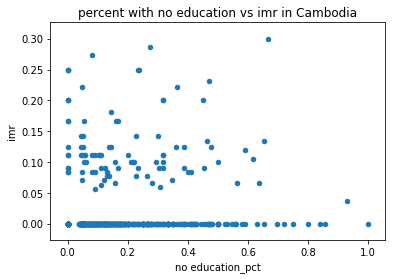

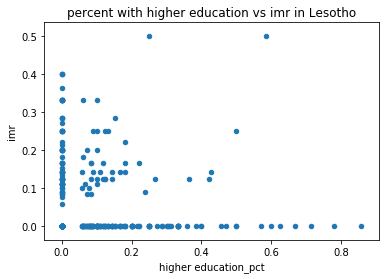

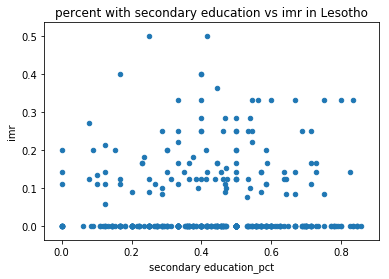

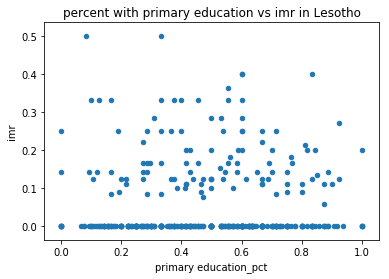

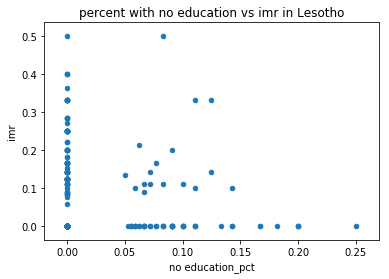

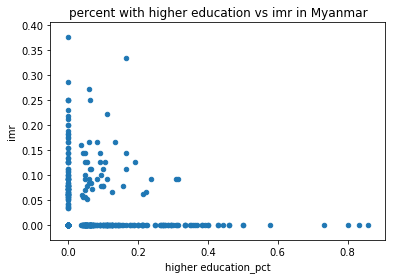

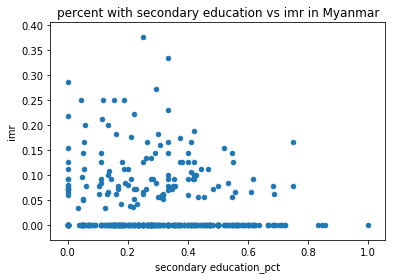

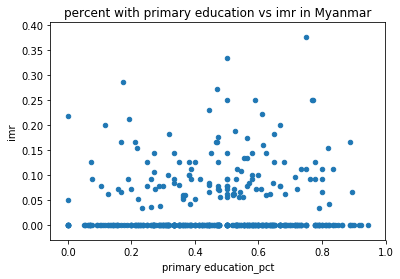

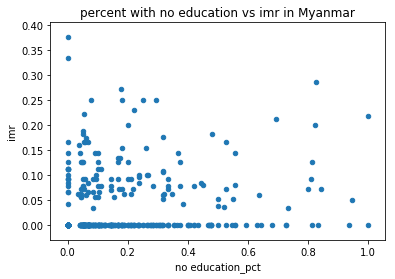

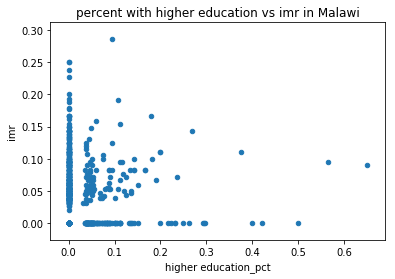

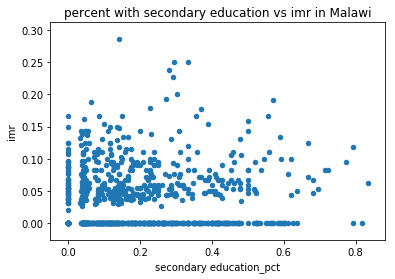

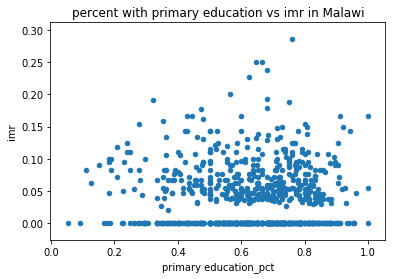

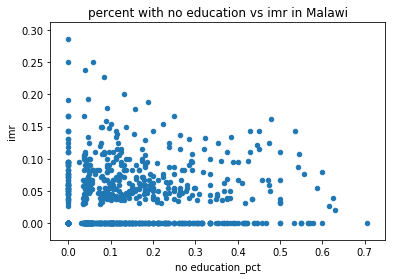

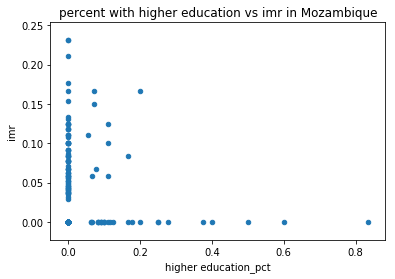

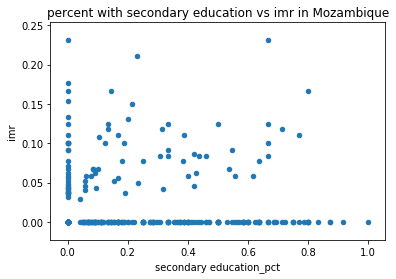

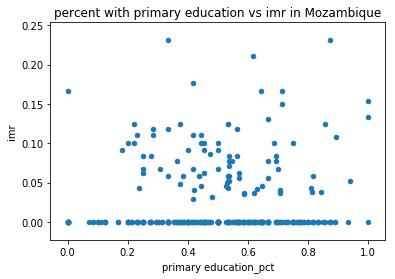

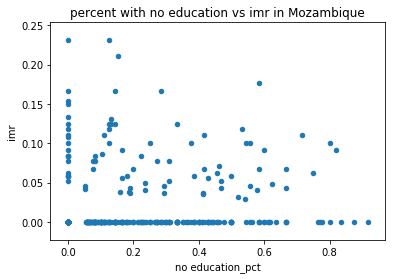

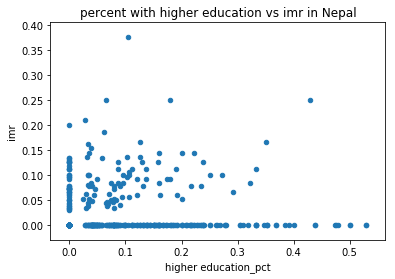

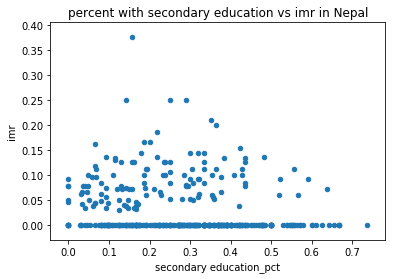

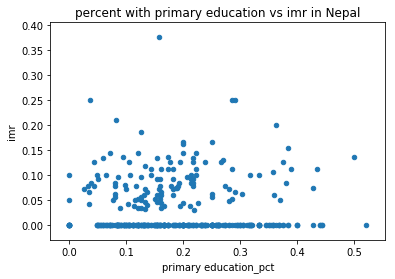

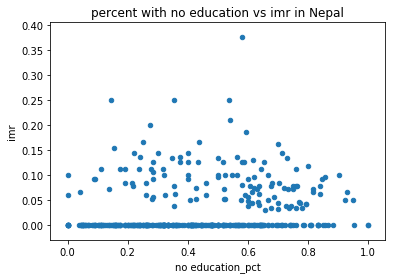

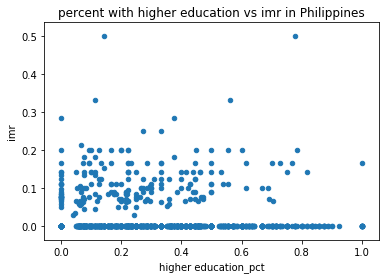

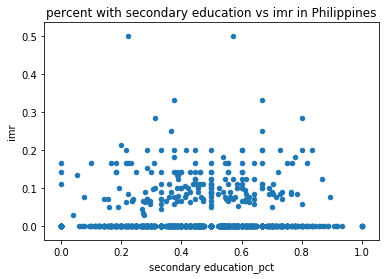

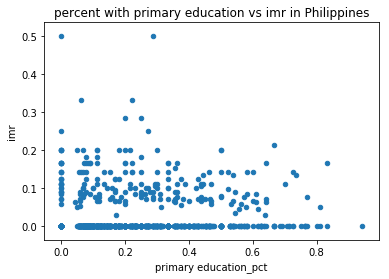

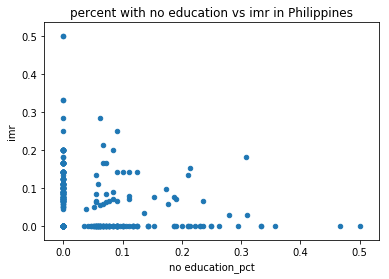

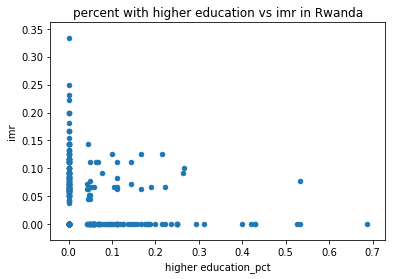

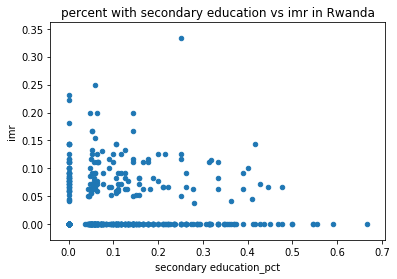

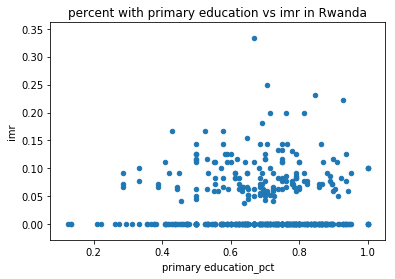

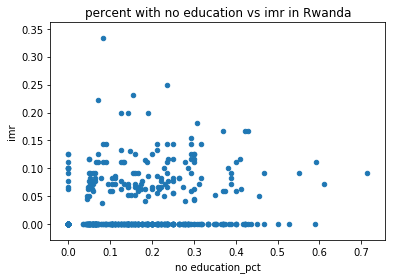

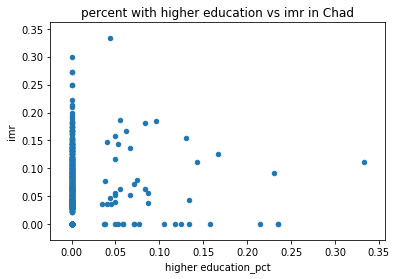

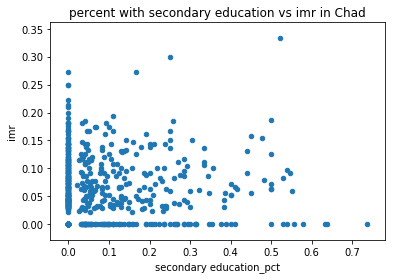

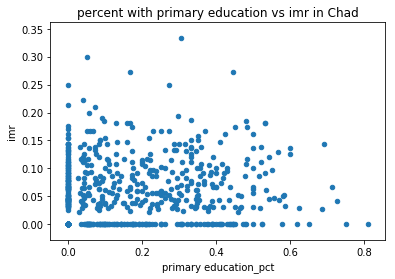

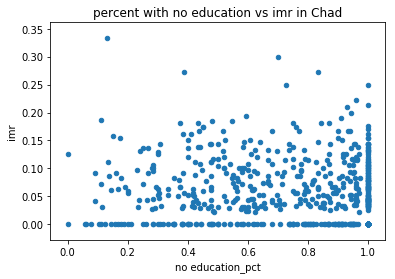

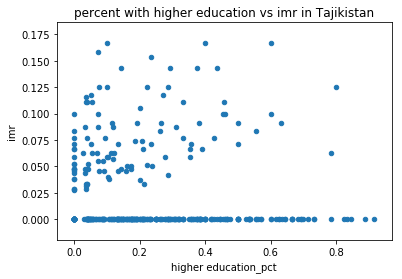

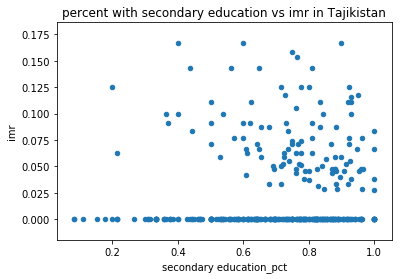

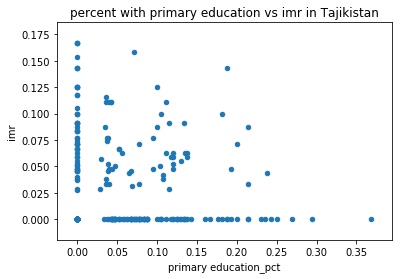

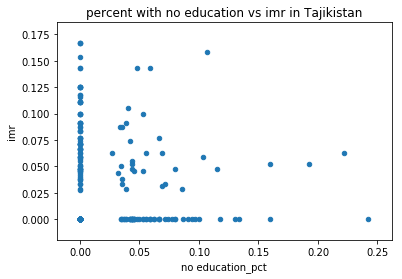

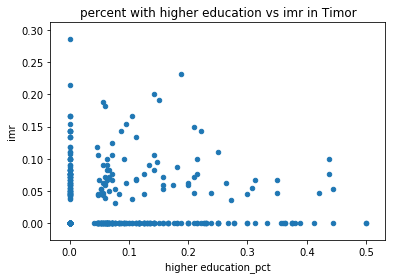

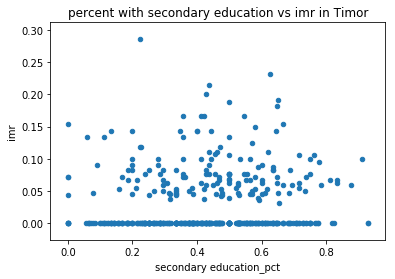

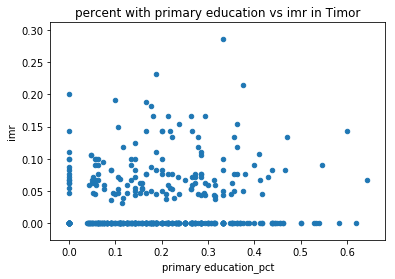

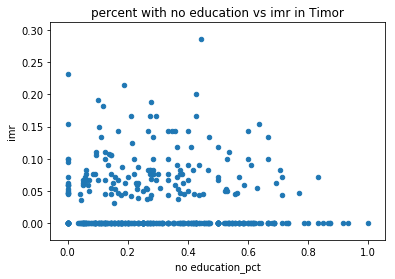

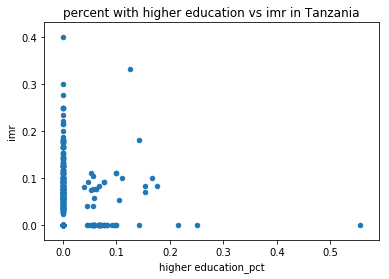

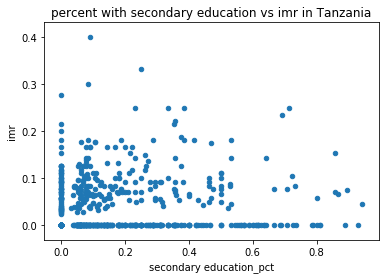

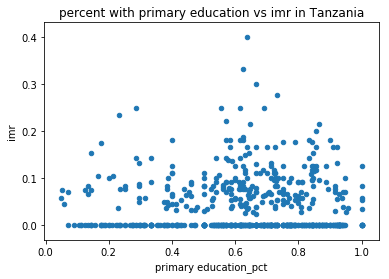

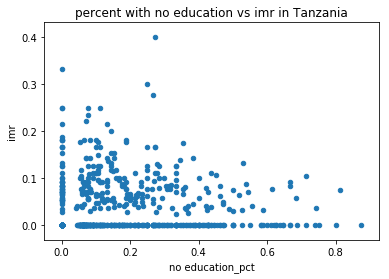

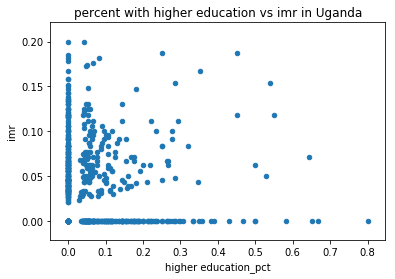

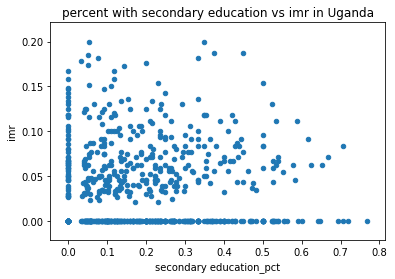

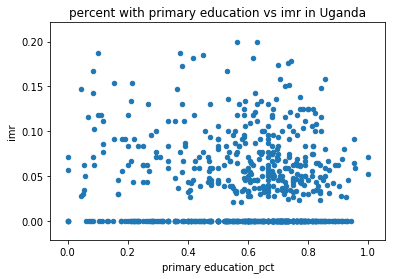

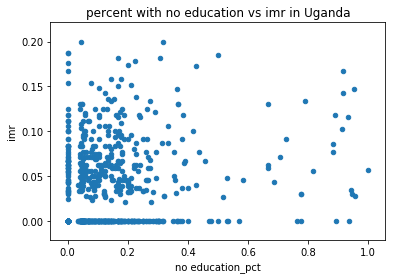

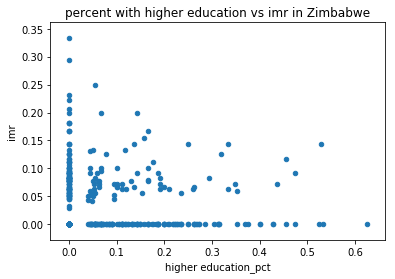

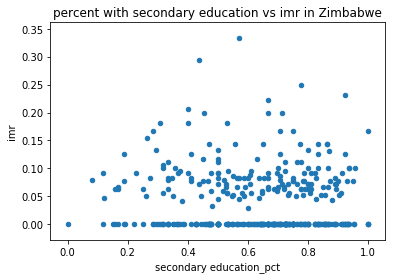

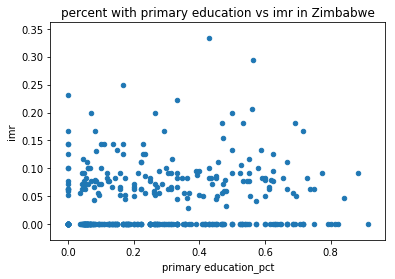

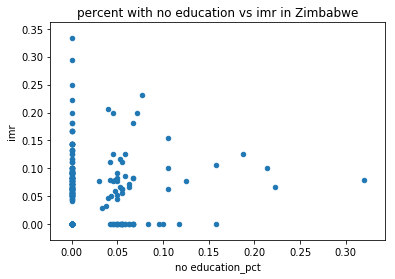

In [317]:
high_correlations = []
threshold = 0.1
for country in countries:
    for level in cat_to_meaning.values():
        cluster_level_combined_country = cluster_level_combined.loc[cluster_level_combined.country==country]
        title = "percent with {} vs imr in {}".format(level, country)
        ed_cat = "{}_pct".format(level)
        cluster_level_combined_country.plot(x=ed_cat, y='imr', kind='scatter', title=title)
        corr = cluster_level_combined_country[[ed_cat, 'imr']].corr('pearson').loc[ed_cat, 'imr']
        print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))
        if abs(corr) >= threshold:
            high_correlations.append((level, country, corr))
            
print('\nAbsolute correlations greater than {}:'.format(threshold))
for level, country, corr in high_correlations:
    print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))

Now, ignore where at least one of the two values is zero

In [318]:
high_correlations = []
threshold = 0.3
for country in countries:
    for level in cat_to_meaning.values():
        ed_cat = "{}_pct".format(level)
        cluster_level_combined_country = cluster_level_combined.loc[cluster_level_combined.country==country][[ed_cat, 'imr']]
        no_zeros = cluster_level_combined_country.loc[(cluster_level_combined_country!=0).all(axis=1)]
        corr = no_zeros.corr('pearson').loc[ed_cat, 'imr']
        print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))
        if abs(corr) >= threshold:
            high_correlations.append((level, country, corr))
            
print('\nAbsolute correlations greater than {}:'.format(threshold))
for level, country, corr in high_correlations:
    print('Pearson correlation of {} and imr in {}: {}'.format(level, country, corr))

Pearson correlation of higher education and imr in Armenia: 0.05652008420226149
Pearson correlation of secondary education and imr in Armenia: 0.1630674216517283
Pearson correlation of primary education and imr in Armenia: 0.0759954545007699
Pearson correlation of no education and imr in Armenia: nan
Pearson correlation of higher education and imr in Angola: 0.23446757534034784
Pearson correlation of secondary education and imr in Angola: -0.035365301596389044
Pearson correlation of primary education and imr in Angola: -0.05654479674002744
Pearson correlation of no education and imr in Angola: 0.11202630793760097
Pearson correlation of higher education and imr in Bangladesh: 0.18042852686163138
Pearson correlation of secondary education and imr in Bangladesh: 0.014538214575805074
Pearson correlation of primary education and imr in Bangladesh: 0.04184531747890919
Pearson correlation of no education and imr in Bangladesh: -0.12743386500264156
Pearson correlation of higher education and i